<center><h1> Time Series </h1></center>
<center> Key Concepts Illustrated </center>

# Import

In [1]:
### General import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm

### Time Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.sarimax_model import SARIMAX

### LSTM Time Series
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout 
from sklearn.preprocessing import MinMaxScaler  

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.21.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


***The Data*** :

We'll be working with time series of Open Power System Data (OPSD, https://open-power-system-data.org/) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

The data can be downloaded here :
https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

# I. Data Analysis

### Exploration

In [3]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0)
df.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


There is a large amount of missing values for wind and solar production.

### Distributions

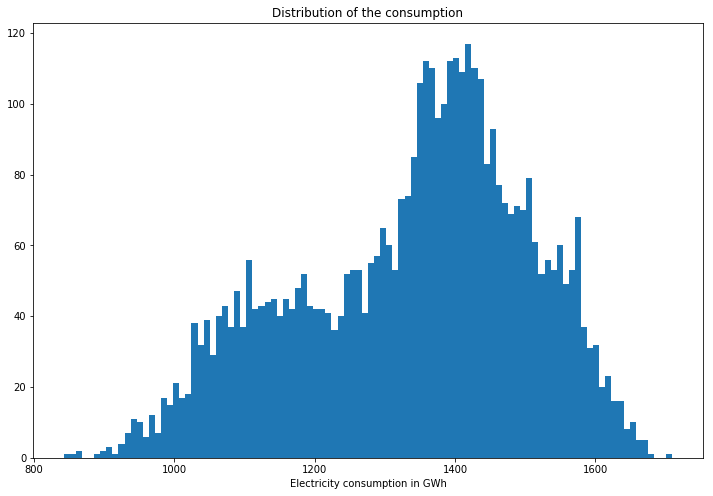

In [6]:
# Distribution of the consumption
plt.figure(figsize=(12,8))
plt.hist(df['Consumption'], bins=100)
plt.title("Distribution of the consumption")
plt.xlabel("Electricity consumption in GWh")
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


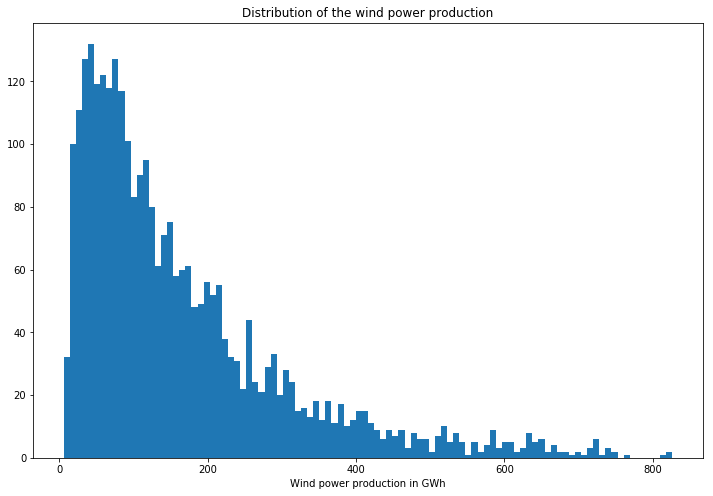

In [7]:
# Distribution of the wind power production
plt.figure(figsize=(12,8))
plt.hist(df['Wind'], bins=100)
plt.title("Distribution of the wind power production")
plt.xlabel("Wind power production in GWh")
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


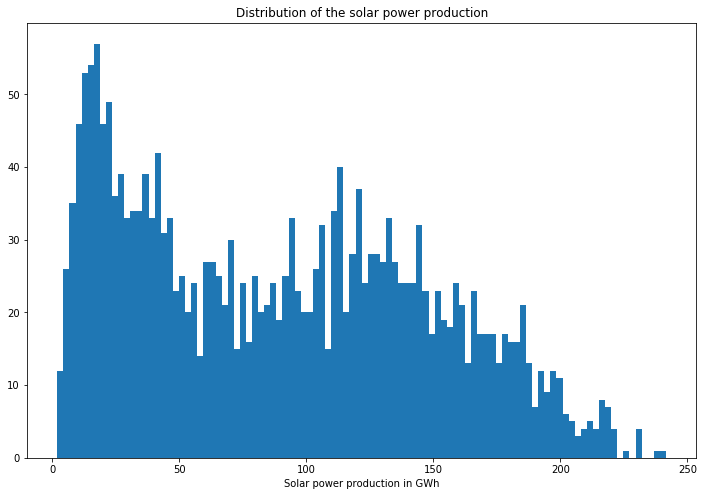

In [8]:
# Distribution of the solar power production
plt.figure(figsize=(12,8))
plt.hist(df['Solar'], bins=100)
plt.title("Distribution of the solar power production")
plt.xlabel("Solar power production in GWh")
plt.show()

### Time series

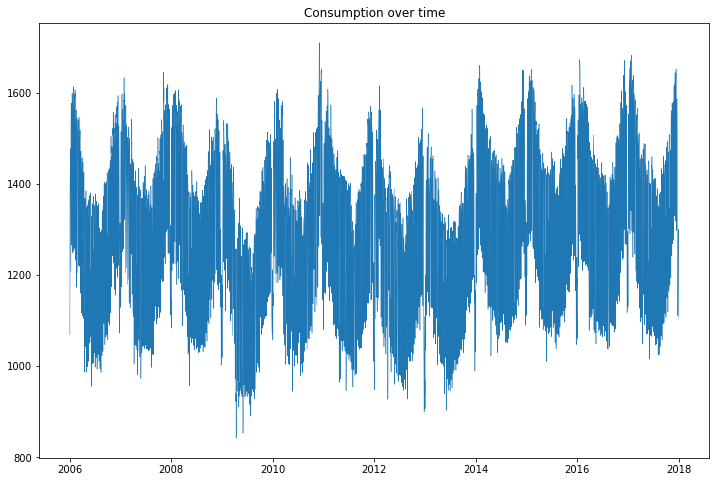

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], linewidth = 0.5)
plt.title("Consumption over time")
plt.show()

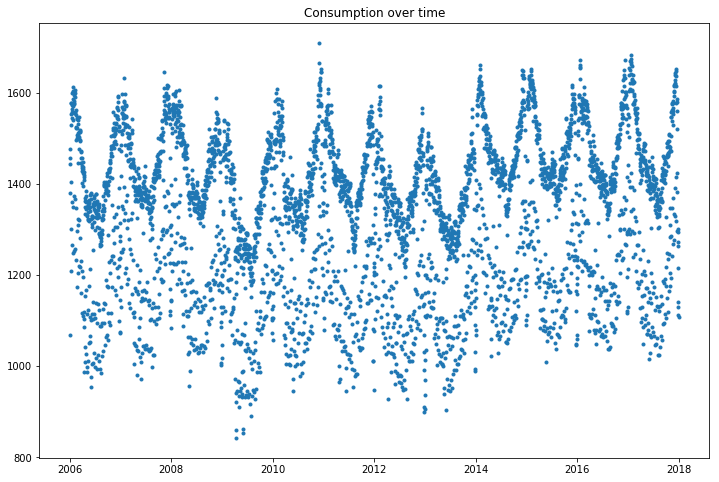

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], linewidth = 0.5, linestyle = "None", marker='.')
plt.title("Consumption over time")
plt.show()

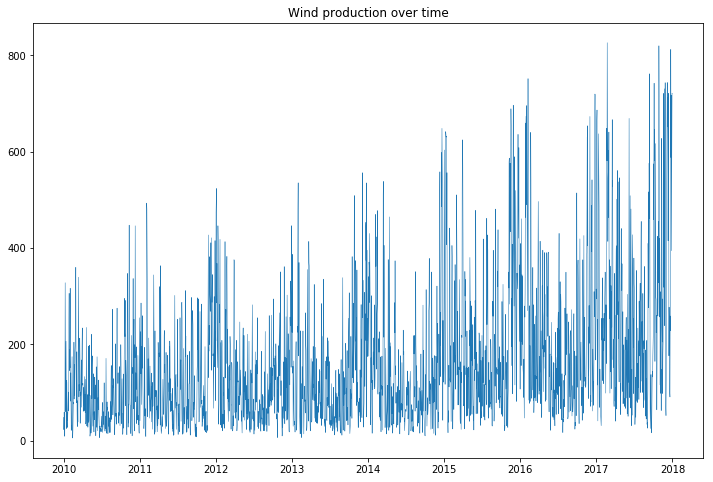

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df['Wind'], linewidth = 0.5)
plt.title("Wind production over time")
plt.show()

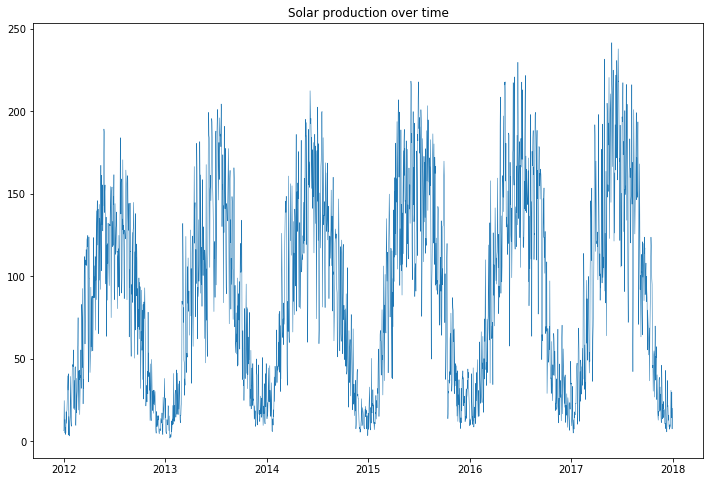

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df['Solar'], linewidth = 0.5)
plt.title("Solar production over time")
plt.show()

We observe large seasonal trends over time. 
- The solar production is much smaller during winter times. 
- The wind production is however larger during winter times, and the consumption as well.
- There is an increasing trend in production of both solar and wind power over time.

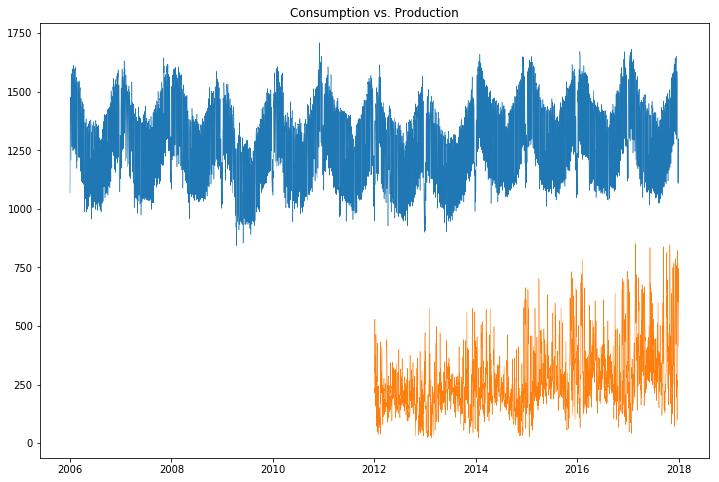

In [13]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], linewidth = 0.5)
plt.plot(df['Wind+Solar'], linewidth = 0.5)
plt.title("Consumption vs. Production")
plt.show()

### Change Scale

#### Yearly

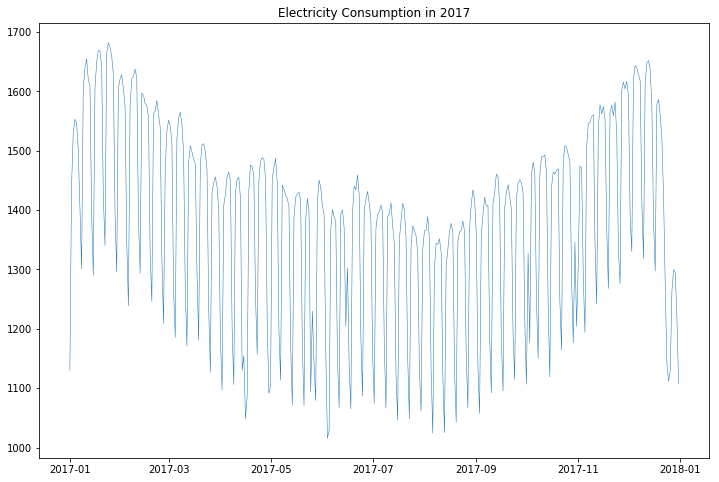

In [14]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-01':'2017-12']['Consumption'], linewidth = 0.5)
plt.title("Electricity Consumption in 2017")
plt.show()

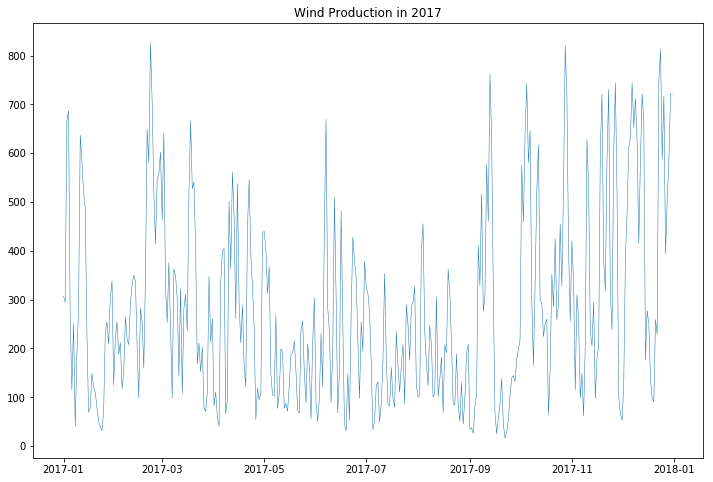

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-01':'2017-12']['Wind'], linewidth = 0.5)
plt.title("Wind Production in 2017")
plt.show()

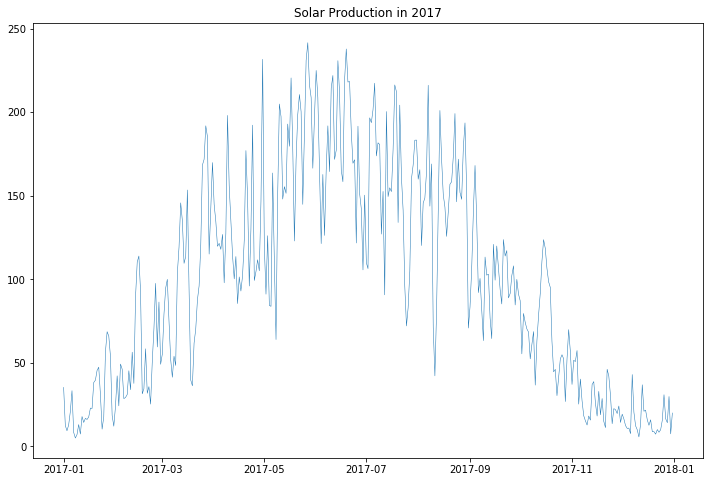

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-01':'2017-12']['Solar'], linewidth = 0.5)
plt.title("Solar Production in 2017")
plt.show()

#### Weekly

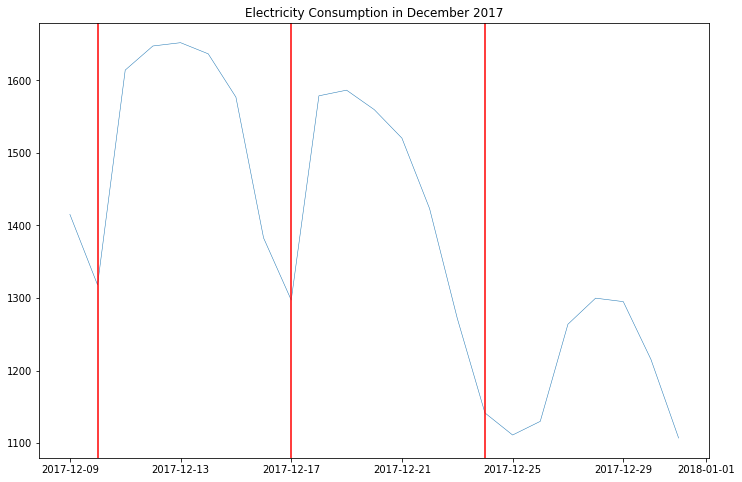

In [17]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2017-12-09':'2017-12-31']['Consumption'], linewidth = 0.5)
plt.title("Electricity Consumption in December 2017")
plt.axvline("2017-12-10", c='r')
plt.axvline("2017-12-17", c='r')
plt.axvline("2017-12-24", c='r')
plt.show()

### Box Plots

In [18]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.weekday_name

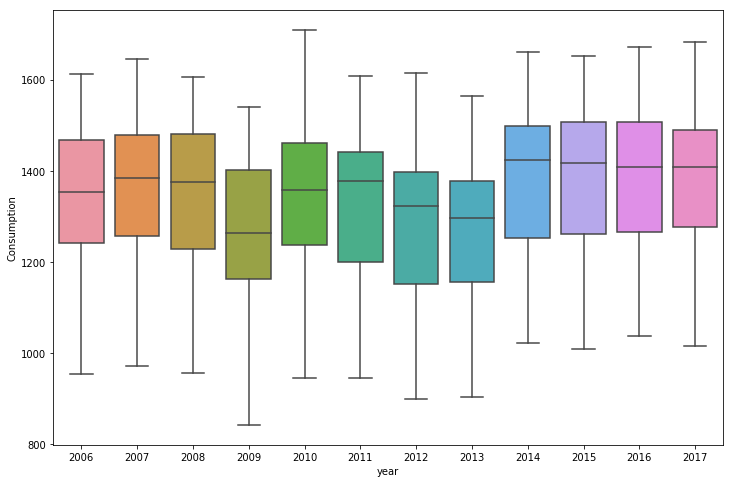

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='year', y='Consumption')
plt.show()

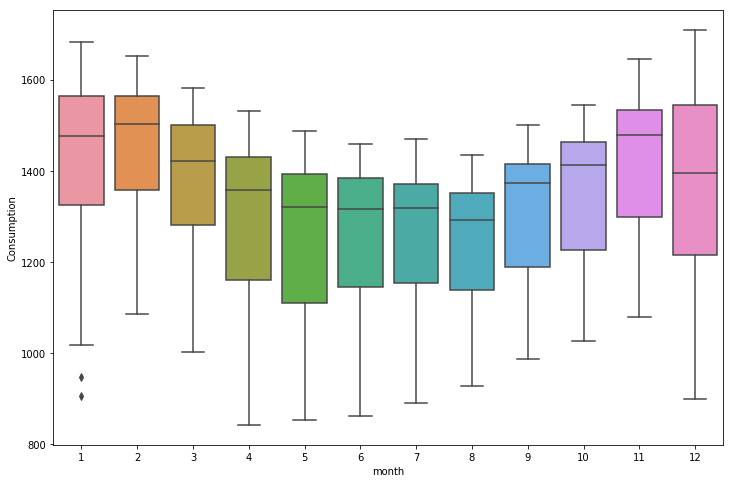

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='month', y='Consumption')
plt.show()

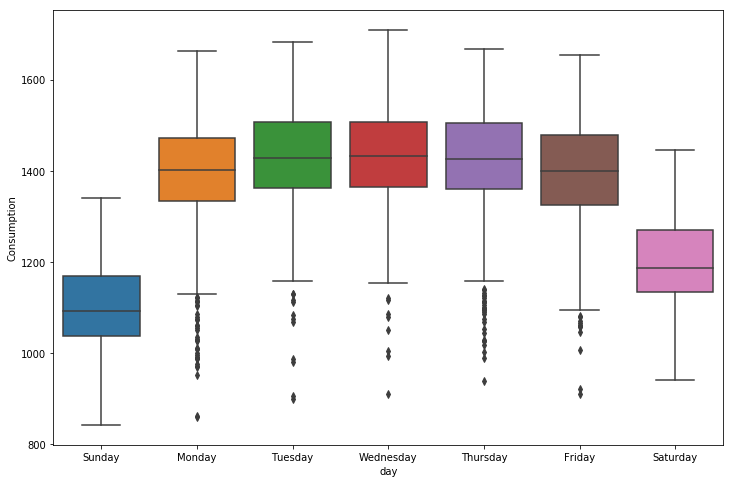

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='day', y='Consumption')
plt.show()

## Filling Missing Values

In [22]:
df = df.fillna(method='ffill')
df.describe()

,Consumption,Wind,Solar,Wind+Solar,year,month
count,4383.000000,2922.000000,2192.000000,2192.000000,4383.000000,4383.000000
mean,1338.675836,164.884228,89.265476,272.461183,2011.500342,6.522930
std,165.775710,143.724954,58.509625,146.249196,3.452347,3.449097
min,842.395000,5.757000,1.968000,21.478000,2006.000000,1.000000
25%,1217.859000,62.377750,35.199250,172.057250,2008.500000,4.000000
50%,1367.123000,119.098000,86.407000,240.746000,2012.000000,7.000000
75%,1457.761000,218.126750,135.031500,338.791500,2014.500000,10.000000
max,1709.568000,826.278000,241.580000,851.556000,2017.000000,12.000000


# II. Analysis of the time series

## Autocorrelation

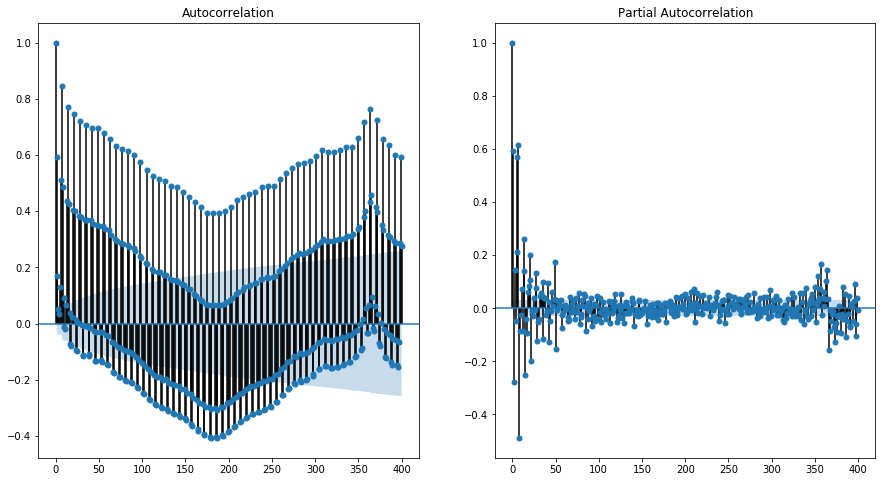

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

fig = sm.graphics.tsa.plot_acf(df['Consumption'], lags=400, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df['Consumption'], lags=400, ax=axes[1])

## Decomposition

<Figure size 432x288 with 0 Axes>

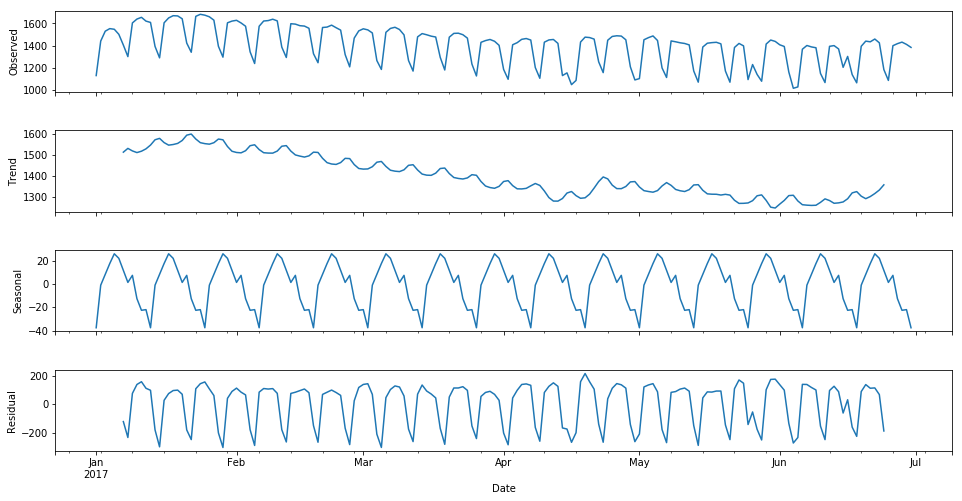

In [24]:
decomposition = seasonal_decompose(df.loc['2017-01':'2017-06', 'Consumption'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

# II. Detrending and preprocessing

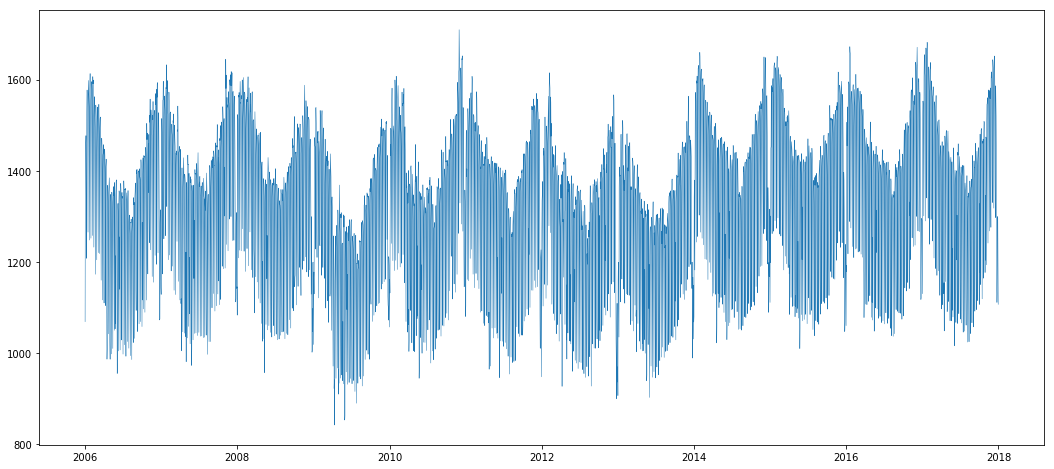

In [77]:
plt.figure(figsize=(18,8))
plt.plot(df.Consumption, linewidth = 0.5)
plt.show()

## Detrend by differencing

### First Difference

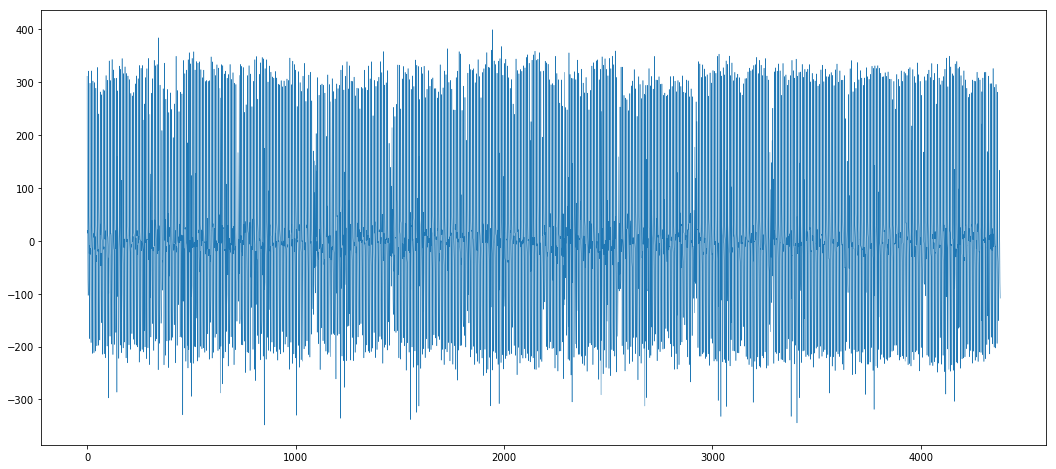

In [76]:
diff = list()
for i in range(1, len(df.Consumption)):
    value = df.Consumption[i] - df.Consumption[i - 1]
    diff.append(value)

plt.figure(figsize=(18,8))
plt.plot(diff, linewidth = 0.5)
plt.show()

### 1-month difference

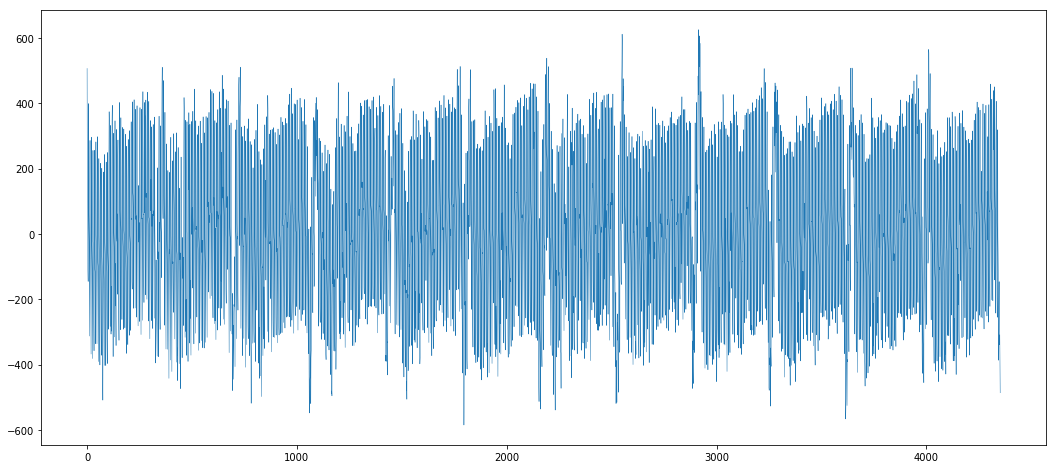

In [79]:
diff = list()

delay = 30

for i in range(delay, len(df.Consumption)):
    value = df.Consumption[i] - df.Consumption[i - delay]
    diff.append(value)

plt.figure(figsize=(18,8))
plt.plot(diff, linewidth = 0.5)
plt.show()

### 1-year difference

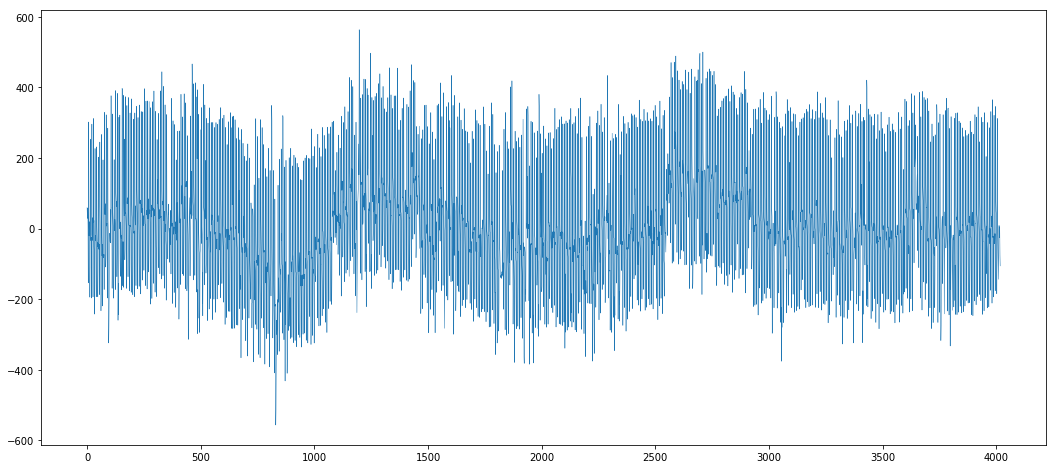

In [80]:
diff = list()

delay = 365

for i in range(delay, len(df.Consumption)):
    value = df.Consumption[i] - df.Consumption[i - delay]
    diff.append(value)

plt.figure(figsize=(18,8))
plt.plot(diff, linewidth = 0.5)
plt.show()

## Detrend by model fitting

### Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(df.Consumption))]
X = np.reshape(X, (len(X), 1))
y = df.Consumption.values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

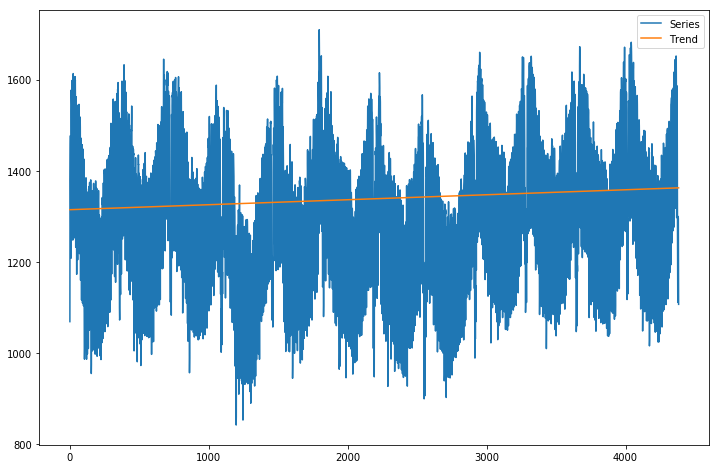

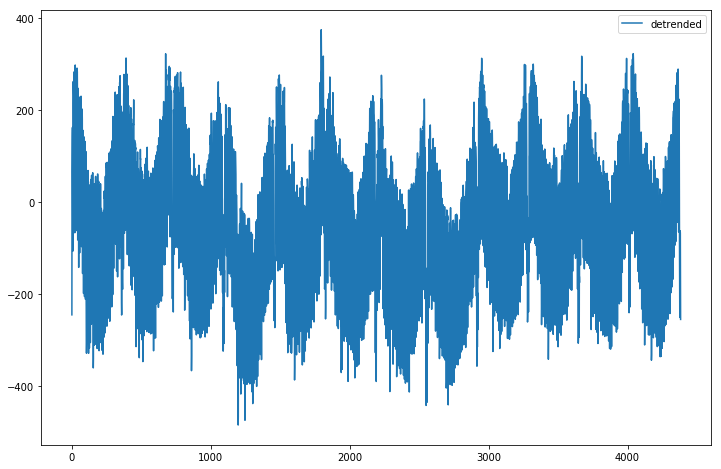

In [86]:
# plot trend
plt.figure(figsize=(12,8))
plt.plot(y, label="Series")
plt.plot(trend, label="Trend")
plt.legend()
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(df.Consumption))]
# plot detrended

plt.figure(figsize=(12,8))
plt.plot(detrended, label="detrended")
plt.legend()
plt.show()

### Sinusoidal curve

ValueError: x and y must have same first dimension, but have shapes (4383,) and (786,)

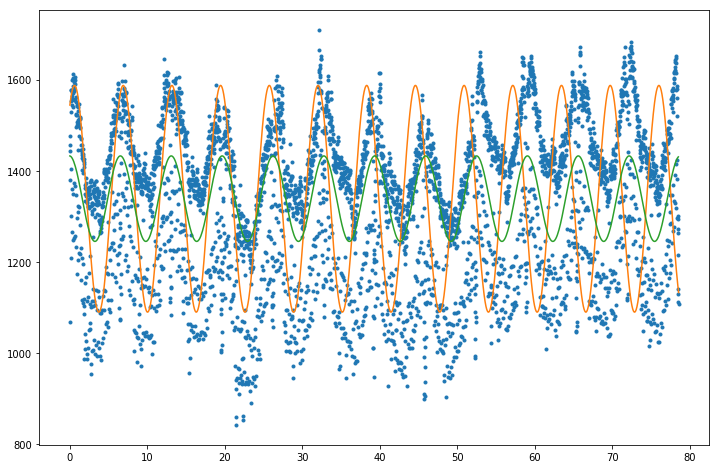

In [125]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

t = np.linspace(0, 25*np.pi, len(df.Consumption))

guess_mean = np.mean(df.Consumption)
guess_std = 3*np.std(df.Consumption)/(2**0.5)/(2**0.5)
guess_phase = 1000
guess_freq = 1
guess_amp = 1000

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - df.Consumption
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit = est_amp * np.sin(est_freq*fine_t+est_phase)+est_mean
#data_res = df.Consumption - data_fit

plt.figure(figsize=(12,8))
plt.plot(t, df.Consumption, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.plot(t, data_fit - df.Consumption[:786], label='residual')
plt.legend()
plt.show()

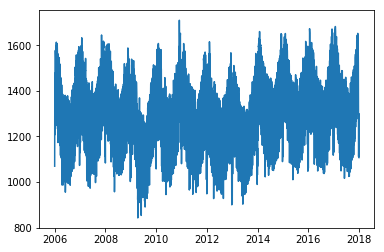

In [122]:
plt.plot(df.Consumption)

# III. Naive Approach : Fitting without preprocessing

In this first modeling section, we're going for a naive approach : we don't preprocess the series (detrending for example), but we try to see how each model performs.

## 1. Moving Average

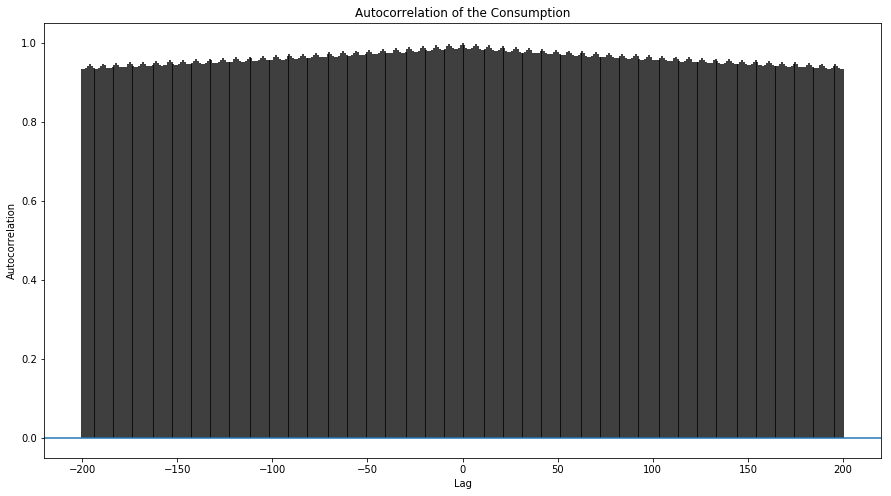

In [57]:
plt.figure(figsize=(15,8))
plt.acorr(df['Consumption'], maxlags=200)
plt.title('Autocorrelation of the Consumption')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

Judging by the high autocorrelation overtime, we can expect MA(1) to perform poorly.

### MA(1)

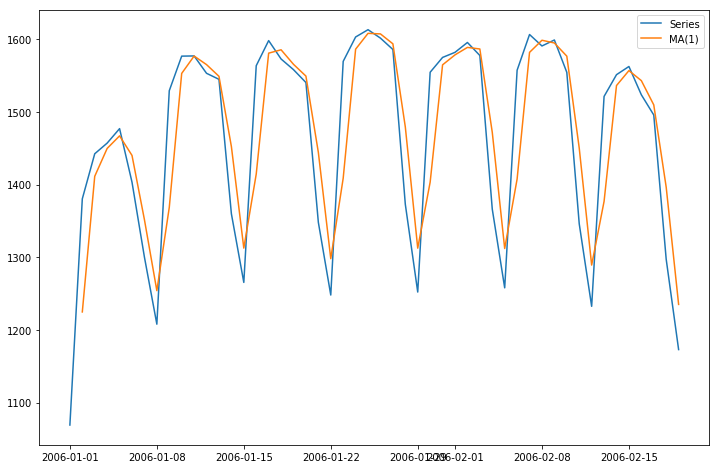

In [56]:
plt.figure(figsize=(12,8))
plt.plot(df.Consumption[:50], label="Series", alpha=1)
plt.plot(df.Consumption.rolling(window=2).mean()[:50], label="MA(1)", alpha=1)
plt.legend()
plt.show()

Using the Moving Average, the series appears to be lagged by 1 day.

### MA(p)

We can increase the number of values we take into account to compute the Moving Average.

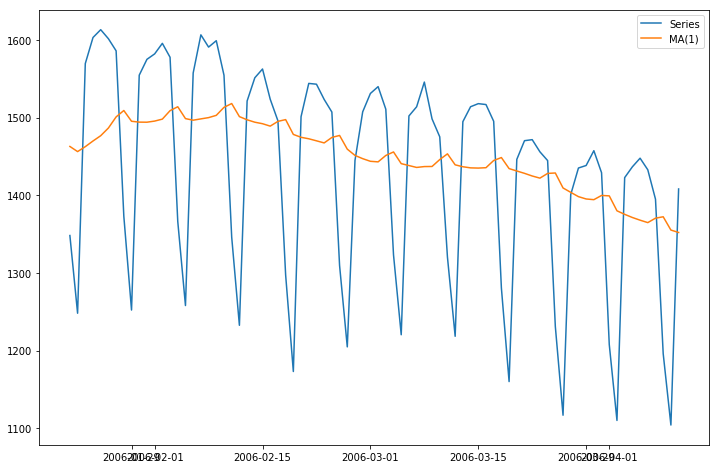

In [60]:
plt.figure(figsize=(12,8))
plt.plot(df.Consumption[20:100], label="Series", alpha=1)
plt.plot(df.Consumption.rolling(window=20).mean()[20:100], label="MA(1)", alpha=1)
plt.legend()
plt.show()

In such case, the series is by definition smoothing the values we encountered previously. This brings a major issue in the sense that we are unable to understand the underlying trend.

## 2. Auto-Regressive

In [62]:
from statsmodels.tsa.arima_process import ArmaProcess

In [68]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

train, test = df.Consumption[1:500], df.Consumption[500:]

model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 18
Coefficients: const              119.818058
L1.Consumption       0.528980
L2.Consumption       0.012540
L3.Consumption       0.162581
L4.Consumption      -0.126188
L5.Consumption       0.036824
L6.Consumption       0.089502
L7.Consumption       0.427422
L8.Consumption      -0.254587
L9.Consumption      -0.034452
L10.Consumption     -0.032163
L11.Consumption      0.059589
L12.Consumption     -0.060774
L13.Consumption     -0.045537
L14.Consumption      0.435467
L15.Consumption     -0.186776
L16.Consumption     -0.031871
L17.Consumption     -0.109647
L18.Consumption      0.039726
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Test MSE: 26659.125


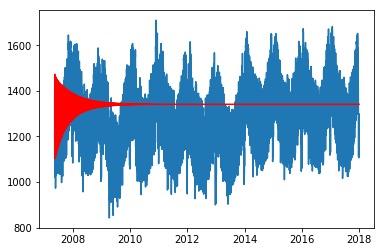

In [70]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


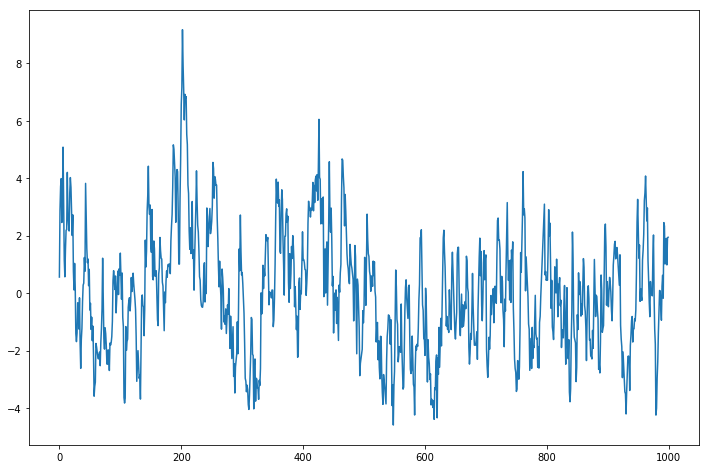

In [63]:
plt.figure(figsize=(12,8))
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)